In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import random

## The Predict Function
Based on adding all of the input's attributes, then assigning a classification (__1.0__ for _Positive Diabetes_ and __-1.0__ for _Negative Diabetes_).

The first weight is a bias, which is not modified during the training.

In [55]:
def predict(row, weights):
    result = weights[0]
    for i in range(len(row)):
        result += weights[i + 1] * row[i]

    return 1.0 if result > 0.0 else -1.0

## Loading the Dataset

In [56]:
df = pd.read_csv('diabetes.csv')
df.loc[df['Outcome'] == 0, 'Outcome'] = -1
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,-1
764,2,122,70,27,0,36.8,0.340,27,-1
765,5,121,72,23,112,26.2,0.245,30,-1
766,1,126,60,0,0,30.1,0.349,47,1


## Dividing the dataset into train and test datasets
The division is made using 80% of the dataset for training, and 20% for testing.

The classification (the 'Outcome' column in the database) is also stored for later use.

In [57]:
test_pct = 0.2
rows = df.shape[0]

train_rows = round((1 - test_pct) * rows)

train_df = df[:train_rows]
test_df = df[train_rows:]
expected_predictions = train_df['Outcome']

## Setting the weights

The same amount of weights as columns in the dataset.

The first weight is a bias, which is not going to be modified. The remaining weights are assigned a random value between 0 and 3.

In [58]:
weights = [0] * len(df.columns)
weights[0] = 0.5
for i in range(1, len(weights)):
    weights[i] = random.randrange(0, 3)


## Training the model

The outer _for_ represents the epochs that the training will last.
Then, for each row in the dataset, a classification will be made using the [predict function](#The-Predict-Function) defined at the top.

In the case where the prediction is incorrect, the weights are rebalanced using the following equation:
$$w_i = w_i + (x_i * y)$$
Where _i_ is the index of the attribute or column, _x_ is the row, and _y_ is the table's classification value for that row.

In [59]:
for _ in range(100):
    for index, row in train_df.iterrows():
        prediction = predict(row[:len(row) - 1], weights)
        expected = expected_predictions[index]

        if prediction != expected:
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + row[i] * expected


## Testing the model

For each row in the testing dataset, a classification is made using the predict function.

In [60]:
correct = 0
incorrect = 0
expected_predictions = df['Outcome']
for index, row in df.iterrows():
    prediction = predict(row[:len(row) - 1], weights)
    expected = expected_predictions[index]

    if prediction == expected:
        correct += 1
        # print('Correct prediction')
    else:
        incorrect += 1
        # print('Incorrect prediction')

print('\n----- Stats -----')
print(f'\tFinal weights: {weights}')
print(f'\tTotal correct predictions: {correct}')
print(f'\tTotal incorrect predictions: {incorrect}')
print(f'\tPercentage: {round((correct / (correct + incorrect)) * 100)}%')


----- Stats -----
	Final weights: [0.5, 1566.0, 96.0, -323.0, -196.0, 158.0, 24.799999999998455, 543.1340000000054, -352.0]
	Total correct predictions: 496
	Total incorrect predictions: 272
	Percentage: 65%


## Dataset Analysis

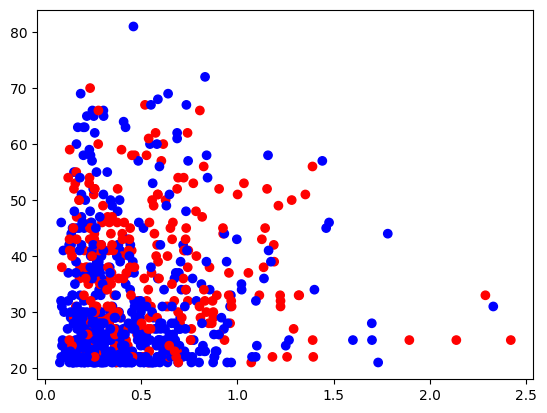

In [ ]:
plt.scatter(df['DiabetesPedigreeFunction '], df['Age '], c=df['Outcome'], cmap='bwr')
plt.show()

The dataset as plot using different combinations of columns for the _x_ and _y_ axis of the plot, and using blue and red coloring for the outcome.

Analyzing the plots, we can see that there is a lot of noise, and the dataset cannot be divided using a single line, explaining the low rate of correct predictions.